# Wine Quality Analysis
This study explores how different chemical components in wine affect its quality. We will focus on key elements that might lower or raise the quality of the wine such as volatile acidity and sulfur dioxide. By analyzing a range of wine samples, our goal is to pinpoint which ingredients enhance or detract from the quality, helping winemakers produce better wines.

# 1. Download Dataset

Below, we are using the Kaggle API to download the Red Wine Quality Dataset.

In [2]:
#@title Import Libraries and Data
#import required libraries
import kagglehub as kh
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


!pip install --upgrade kagglehub
path = kh.dataset_download("uciml/red-wine-quality-cortez-et-al-2009") # use kagglehub library

# Load the dataset into a DataFrame
csv_file_path = os.path.join(path, "winequality-red.csv") # create path to our wine quality file
wine_df = pd.read_csv(csv_file_path) # read csv using pandas library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.5
    Uninstalling kagglehub-0.3.5:
      Successfully uninstalled kagglehub-0.3.5


100%|██████████| 25.6k/25.6k [00:00<00:00, 29.9MB/s]

Extracting files...


# 2. Explore the Dataset

Below, we can take a look at the first few rows of the dataset, along with the number of rows and columns, and the types of data we will be working with.

In [4]:
#@title First Five Rows of Wine Data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#@title Number of Rows and Columns
print("Number of Rows and Columns as (#rows, # columns): ")
wine_df.shape # returns (rows, columns)

Number of Rows and Columns


(1599, 12)

In [5]:
#@title Wine Data Frame Datatypes
wine_df.dtypes # return data types in data frame

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


# 3. Summary Statistics

After the initial exploration of our data, we dive into relevant statistics for the dataset.

In [6]:
#@title Summary Statistics
wine_df.describe() # return summary statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#@title Top Five Wines with Highest Alcohol Percentage
wine_df.sort_values('alcohol', ascending=False).head(5) # sort by alcohol ascending and show first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6


In [8]:
#@title Highest Quality Wines
wine_df.sort_values('quality', ascending=False).head(5) # sort by quality ascending and show first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


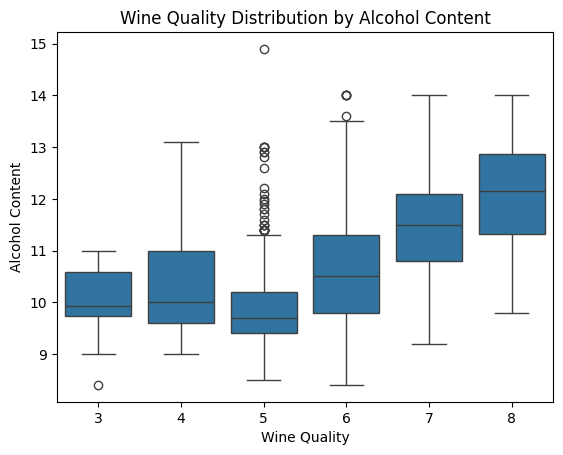

In [9]:
# @title Wine Quality Distribution by Alcohol Content
sns.boxplot(x='quality', y='alcohol', data=wine_df) # set x and y variables for box plot with wine_df as data
plt.xlabel('Wine Quality') # label x axis
plt.ylabel('Alcohol Content') # label y axis
plot_title = plt.title('Wine Quality Distribution by Alcohol Content') # add title

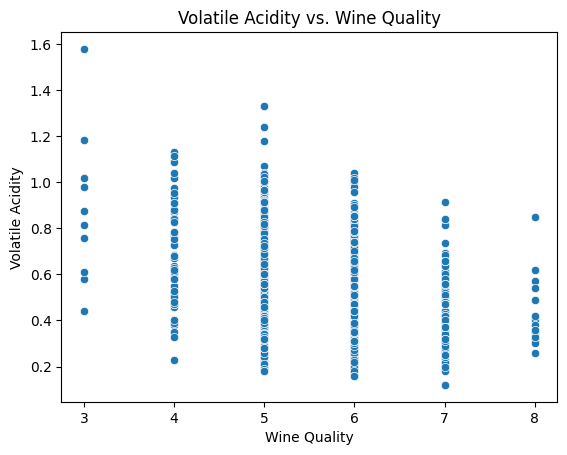

In [10]:
# @title Volatile Acidity vs. Wine Quality
sns.scatterplot(x='quality', y='volatile acidity', data=wine_df) # set x and y variables
plt.xlabel('Wine Quality') # label x axis
plt.ylabel('Volatile Acidity') # label y axis
plot_title = plt.title('Volatile Acidity vs. Wine Quality')  # set title

# 4. **Filtering**

Next, we are using filtering to extract subsets of the data based on different conditions to answer some key questions.

In [11]:
# @title How many wines have an above average quality?

# Calculate the average quality
average_quality = wine_df['quality'].mean()

# Count wines above average quality
wines_above_average = wine_df[wine_df['quality'] > average_quality]
num_wines_above_average = len(wines_above_average)
print(f"Number of wines with quality above average ({average_quality:.2f}): {num_wines_above_average}")

Number of wines with quality above average (5.64): 855


In [12]:
#@title What is the mean residual sugar for the top scoring wines?
top_score = wine_df['quality'].max() # find the highest quality score
top_score_wines = wine_df[wine_df['quality'] == top_score] # filter where quality equals the top score
print(f"The mean residual sugar for the top-scoring wines is: ")
round(top_score_wines['residual sugar'].mean(), 2) # find the mean residual sugar

The mean residual sugar for the top-scoring wines is: 


2.58

In [13]:
#@title What is the mean alcohol content for the top scoring wines?
print(f"The mean residual sugar for the top-scoring wines is: ")
round(top_score_wines['alcohol'].mean(), 2) # find the mean alcohol content

The mean residual sugar for the top-scoring wines is: 


12.09

# 5. Output

Provide a summary of your findings based on the filtering and grouping operations.

Wine quality is about balancing various components. For example, residual sugar can help offset higher alcohols by softening any bitterness or harshness due to the alcohol content.

What factors that correlate with a wine's quality?

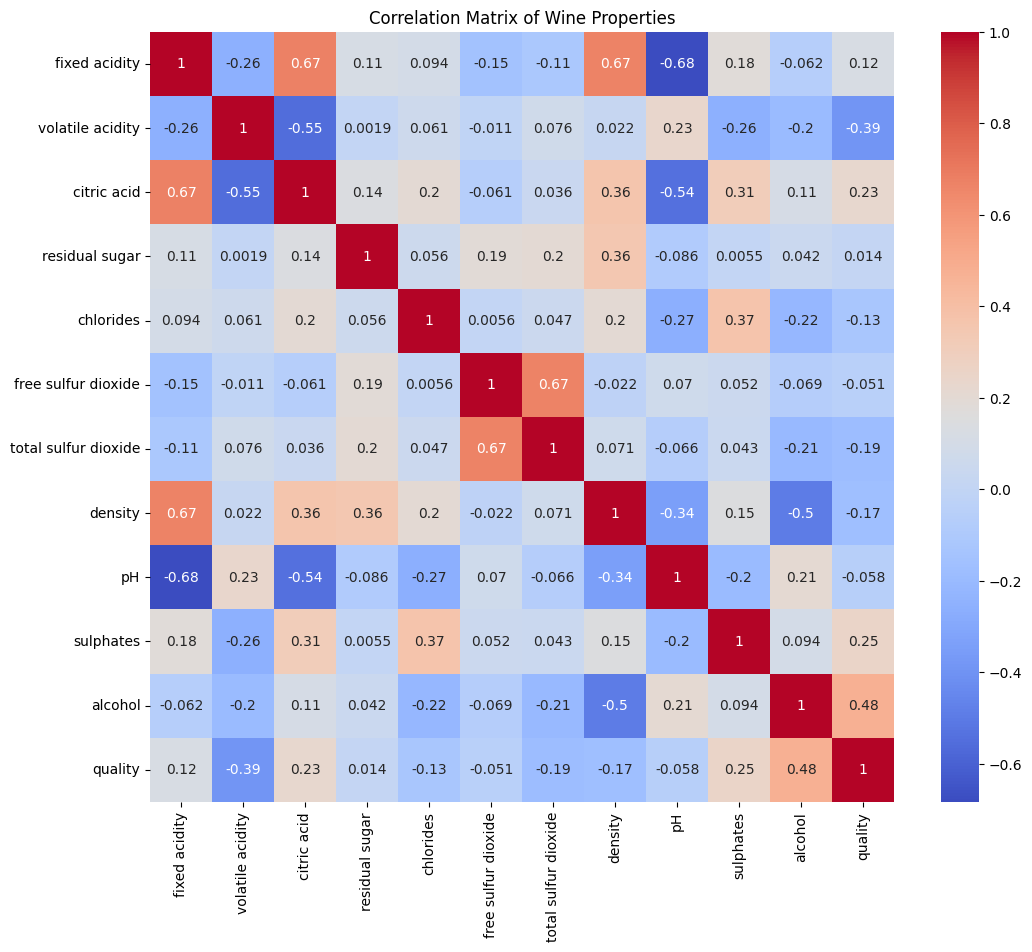

In [14]:
# @title Correlation Matrix of Wine Properties
plt.figure(figsize=(12, 10)) # make plot size larger to accomodate labels
correlations = wine_df.corr() # correlation using columns in the wine_df data
sns.heatmap(correlations, annot=True, cmap='coolwarm') # create a heatmap using the correlations
plot_title = plt.title('Correlation Matrix of Wine Properties')

R-squared (R²): 0.45


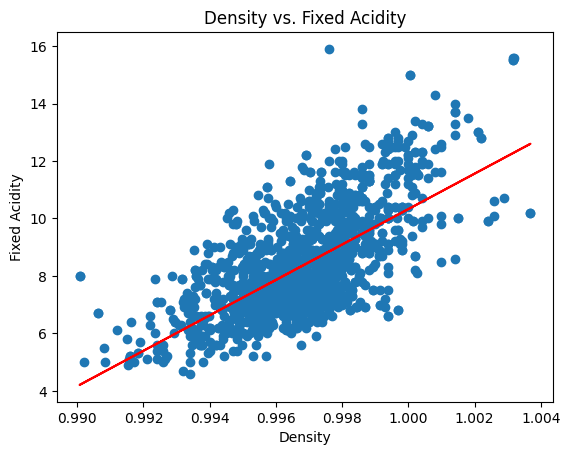

In [15]:
above_avg_wines = wine_df[wine_df['quality'] > wine_df['quality'].mean()]
x = wine_df['density']
y = wine_df['fixed acidity']
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red')
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')
plt.title('Density vs. Fixed Acidity')
r2 = model.score(x.values.reshape(-1, 1), y)
print(f"R-squared (R²): {r2:.2f}")
plt.show()


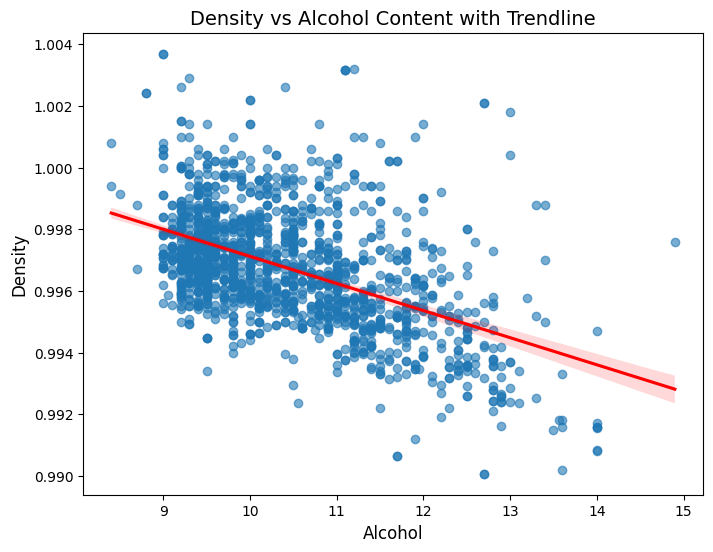

-0.4961797702417018

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x='alcohol', y='density', data=wine_df, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density vs Alcohol Content with Trendline', fontsize=14)
plt.show()

# Calculate correlation coefficient
correlation_density_alcohol = wine_df['density'].corr(wine_df['alcohol'])
correlation_density_alcohol

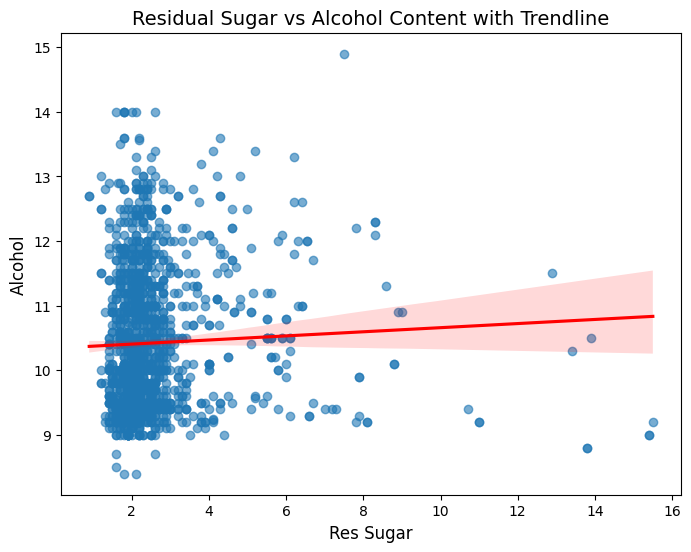

0.04207543720973102

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x='residual sugar', y='alcohol', data=wine_df, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.xlabel('Res Sugar', fontsize=12)
plt.ylabel('Alcohol', fontsize=12)
plt.title('Residual Sugar vs Alcohol Content with Trendline', fontsize=14)
plt.show()

# Calculate correlation coefficient
correlation_density_alcohol = wine_df['alcohol'].corr(wine_df['residual sugar'])
correlation_density_alcohol

## Linear Regression model to understand what contributes the most to the quality score.


Mean Squared Error: 0.39
R-squared (R²): 0.40


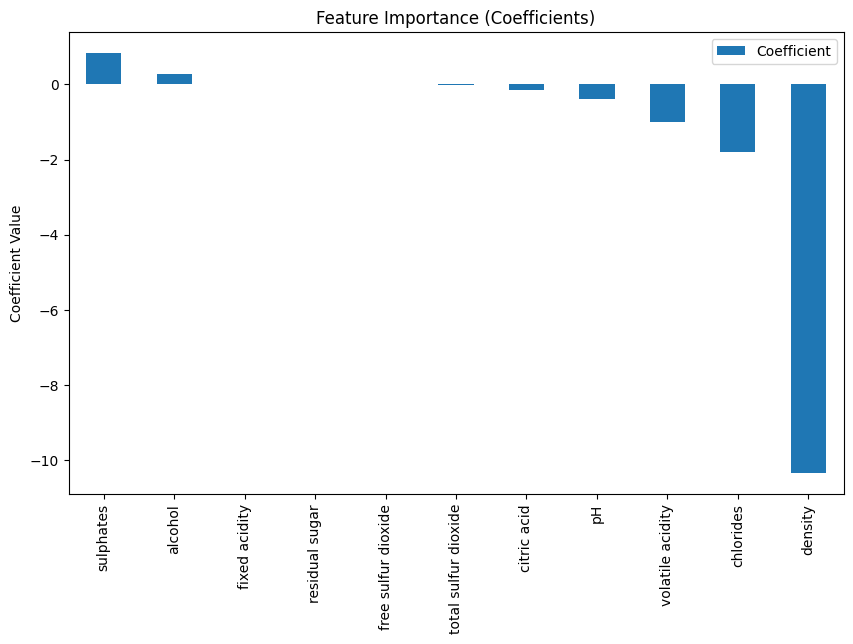

In [18]:

X = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']]
y = wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance (Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()
#r-squared is .40 -> not good explanation of data womp womp

In [20]:
# Hmm not very good model, lets do something simpler to find out what makes a good wine
quality_correlations = correlations['quality'].drop('quality')
quality_correlations
top_three = quality_correlations.nlargest(3)
top_three

,quality
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373


In [21]:
#What reduces quality?
bottom_three = quality_correlations.nsmallest(3)
bottom_three

,quality
volatile acidity,-0.390558
total sulfur dioxide,-0.185100
density,-0.174919


# Conclusion:
A fine wine is determined by its balance of various chemical components. Through our analysis, we have identified that alcohol content, sulphates level, and citric acid content exhibit the strongest positive correlations with wine quality scores. This suggests that higher concentrations of these elements are generally associated with higher-quality wines.

Inversely, volatile acidity, total sulfur dioxide, and density show the strongest negative correlations with quality scores. Higher levels of these components tend to correspond with lower wine quality, indicating that their presence in greater amounts might detract from the overall quality of the wine.

By carefully managing the levels of these critical components, winemakers can better predict and manipulate the quality outcomes of their products, thus meeting consumer expectations more effectively.

